In [16]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import *
def adf_test(ts,rs):
    #ts:numpy.ndarray,rs:'c' 'ct' 'nc'
    adftest = adfuller(ts,regression=rs)
    adf_res = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in adftest[4].items():
        adf_res['Critical Value (%s)' % key] = value
    return adf_res
def getids(typeid):
    typepath='./figures/'+str(typeid)
    FileNames=os.listdir(typepath)
    ids = [w.replace('.jpg', '') for w in FileNames]
    return ids
def plotuser(user_id):
    p1=p[p['user_id']==user_id]
    p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
    p1s.plot()
    plt.show()
    return p1
def plotacfpacf(dta):
    #dta:numpy.ndarray
    fig = plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
    plt.show()
def filterp(userids,p):
    for i in userids:
        p=p[p.user_id<>int(i)]
    return p
 
        
    
p=pd.read_csv('./Tianchi_power.csv',parse_dates=[0],infer_datetime_format=True)

In [17]:
p=p[p.user_id<>1416]
p=p[p.user_id<>175]
p=p[p.user_id<>174]

In [18]:
type1ids=getids(1)
p=filterp(type1ids,p)
type1ids=getids(4)
p=filterp(type1ids,p)
type1ids=getids(5)
p=filterp(type1ids,p)
type1ids=getids(7)
p=filterp(type1ids,p)

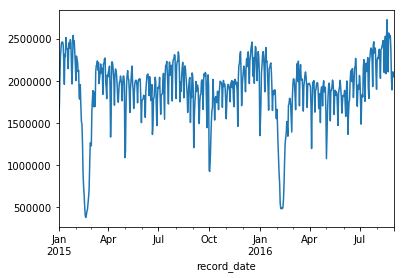

In [19]:
pg=p.groupby(['record_date'],as_index=False).sum()
p1=pg
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

In [20]:
pg.to_csv('pg2.csv',index=False)

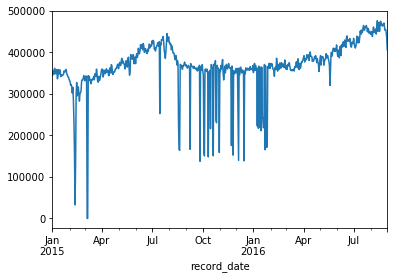

In [46]:
p1=plotuser(174)

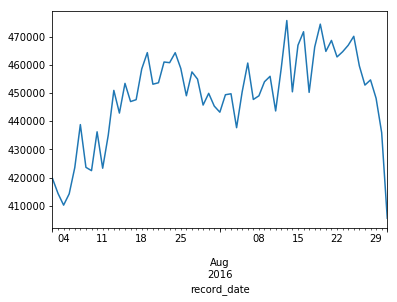

In [3]:
p1=p1[(p1.record_date>'2016-07-01')]
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

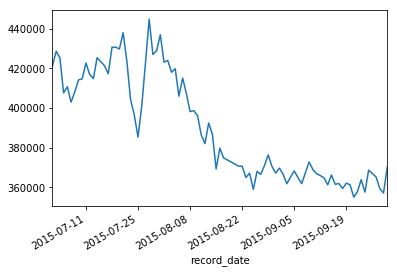

In [10]:
p1=p1[(p1.record_date>'2015-07-01') & (p1.record_date<'2015-10-01')]
p1=p1[p1.power_consumption>300000]
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

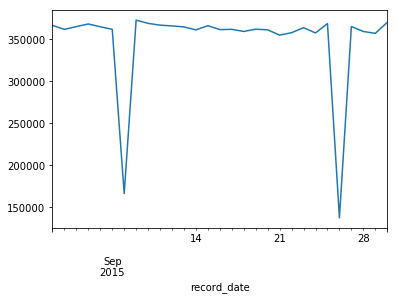

In [14]:
p1=p1[(p1.record_date>'2015-09-01') & (p1.record_date<'2015-10-01')]
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

In [16]:
p1.to_csv('p174.csv')

### 0908是周二，不是假期，0926是中秋节第一天，其他时间基本平稳

### 7、8月份下降趋势并不明显，3月份之后有明显上升趋势，但去年也是3月份之后有明显上升趋势，但8、9月份明显下降到一定水平稳定下来，只有去年一年的数据，无法预测aaaaa，但还是假设和去年相同，也就是九月份将稳定在某一个值

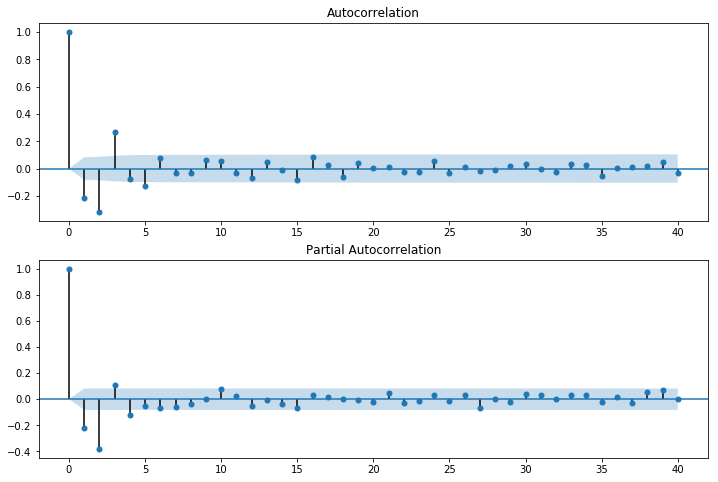

In [44]:
p1=p1[p1.power_consumption>300000]
p1=p1.diff(1)
p1=p1.dropna()
plotacfpacf(p1.power_consumption)

In [38]:
adf_test(p1.power_consumption,'ct')

Test Statistic                  -1.843019
p-value                          0.683655
Lags Used                        7.000000
Number of Observations Used    560.000000
Critical Value (5%)             -3.418359
Critical Value (1%)             -3.975028
Critical Value (10%)            -3.131680
dtype: float64

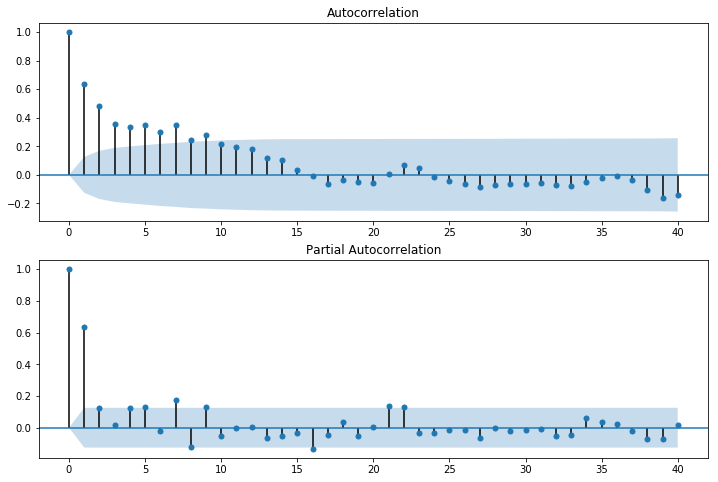

In [30]:
p1_diff=p1.diff(365)
p1_diff=p1_diff.dropna()
plotacfpacf(p1_diff.power_consumption)

In [31]:
adf_test(p1_diff.power_consumption,'c')

Test Statistic                  -2.771965
p-value                          0.062391
Lags Used                        8.000000
Number of Observations Used    235.000000
Critical Value (5%)             -2.873919
Critical Value (1%)             -3.458487
Critical Value (10%)            -2.573367
dtype: float64

### 一阶差分后自相关截尾，偏自相关拖尾，MA（9）

In [29]:
dta=p1.power_consumption.values
dta=dta.astype(np.float64)
arma_mod42 = sm.tsa.ARIMA(dta,(0,1,4)).fit() 
forecast,stderr ,conf_int =arma_mod42.forecast(30)
pd.DataFrame(forecast).to_csv('forecast174.csv')

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

D:\Anaconda3\envs\py27\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


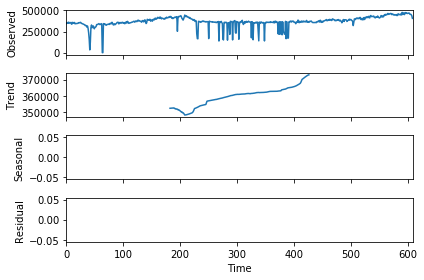

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=p1.power_consumption
decompq = seasonal_decompose(ts.values,freq=365)
resplot = decompq.plot()
plt.show()

## 就用去年9月的均值来预测好了

In [47]:
p1=p1[(p1.record_date>'2015-09-01') & (p1.record_date<'2015-10-01')]
p1=p1[p1.power_consumption>300000]

In [49]:
p1.power_consumption.mean()

363475.85185185185

### 从图片看有两个阶段

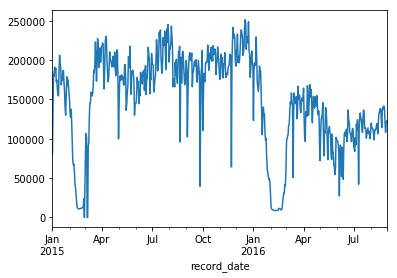

D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [154]:
p1=plotuser(90)
p1['dayofweek']=p1.record_date.apply(lambda x: x.weekday())

D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':
D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


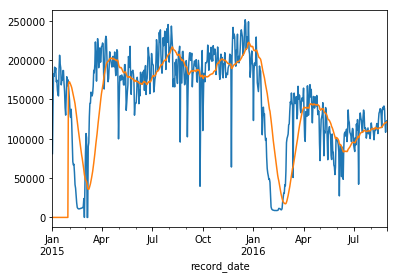

In [140]:
p1['rolling7']=pd.rolling_mean(p1.power_consumption, 30)
p1=p1.fillna(0)
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
p1rolling=pd.Series(p1.rolling7.values,index=p1.record_date,name='power_consumption')
p1rolling.plot()
plt.show()

In [126]:
p1[p1.record_date>'2016-07-01']

,record_date,user_id,power_consumption,dayofweek
54749,2016-07-02,90,87405,5
54750,2016-07-03,90,83808,6
54751,2016-07-04,90,101309,0
54752,2016-07-05,90,92229,1
54753,2016-07-06,90,118697,2
54754,2016-07-07,90,110997,3
54755,2016-07-08,90,124406,4
54756,2016-07-09,90,110018,5
54757,2016-07-10,90,42239,6
54758,2016-07-11,90,112766,0


In [127]:
p18=p1[p1.record_date>'2016-08-01']

In [128]:
p18.power_consumption.mean()

121719.1

### 很明显今年4月份比去年要降了一个水平，5月份有个明显的下降趋势

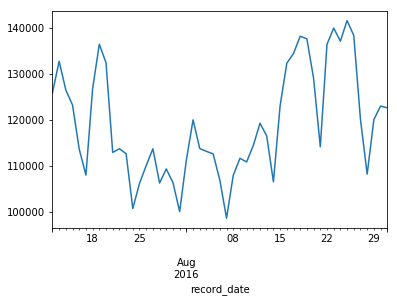

In [155]:
p1=p1[(p1.record_date>'2016-07-11')]
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

In [151]:
p1.to_csv('p90.et',index=False)

In [153]:
p1.groupby(['dayofweek'],as_index=False).mean()

,dayofweek,user_id,power_consumption
0,0,90,118931
1,1,90,125019
2,2,90,124808
3,3,90,121970
4,4,90,122123
5,5,90,115123
6,6,90,105291


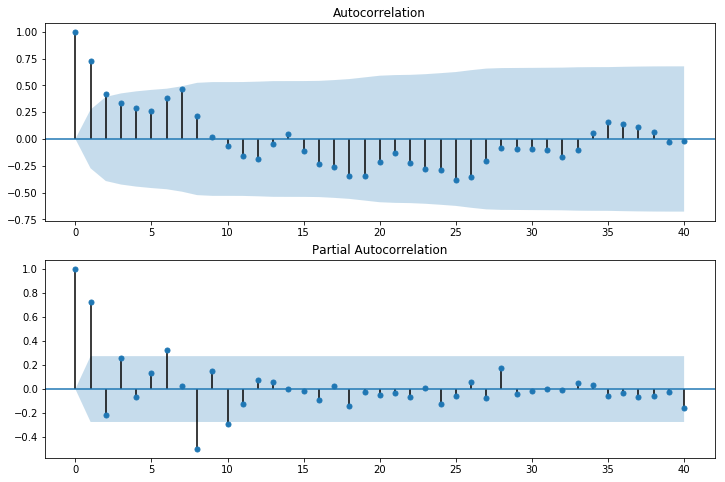

In [145]:
plotacfpacf(p1.power_consumption)

In [150]:
adf_test(p1.power_consumption,'c')

Test Statistic                 -1.266052
p-value                         0.644557
Lags Used                      11.000000
Number of Observations Used    39.000000
Critical Value (5%)            -2.939109
Critical Value (1%)            -3.610400
Critical Value (10%)           -2.608063
dtype: float64

### 上述两个检验表明最近几个月的数据是白噪声，所以就用均值来预测吧，但是有肉眼可见的周内周期性，月之间还有个波形，为什么时间序列分析方法分析不出来呢？先不管这些，分析下去吧

In [39]:
p1['dayofweek']=p1.record_date.apply(lambda x: x.weekday())

D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
p1['weekofyear']=p1.record_date.apply(lambda x: x.week)


D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
p1gw=p1.groupby(['weekofyear'],as_index=False).sum()

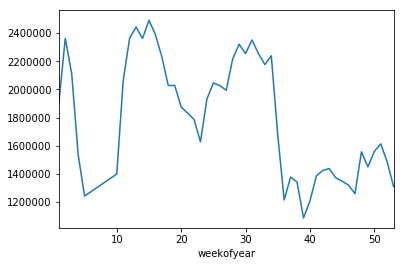

In [57]:
p1s=pd.Series(p1gw.power_consumption.values,index=p1gw.weekofyear,name='power_consumption')
p1s.plot()
plt.show()

In [56]:
p1gw=p1gw[p1gw.power_consumption>1000000]

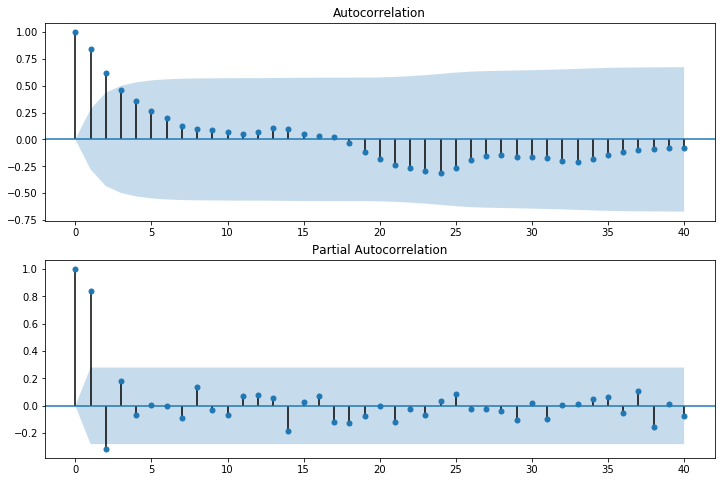

In [58]:
plotacfpacf(p1gw.power_consumption)

In [60]:
adf_test(p1gw.power_consumption,'c')

Test Statistic                 -1.723890
p-value                         0.418848
Lags Used                       3.000000
Number of Observations Used    45.000000
Critical Value (5%)            -2.928299
Critical Value (1%)            -3.584829
Critical Value (10%)           -2.602344
dtype: float64

###  

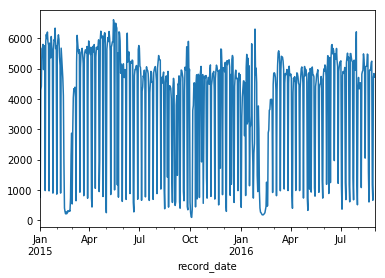

In [71]:
p1=plotuser(65)
p1.to_csv('p65.csv',index=False)

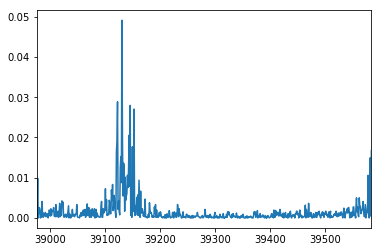

39131    0.049138
Name: power_consumption, dtype: float64

In [103]:
p1v=p1.power_consumption
p1vv=p1v.sort_values().copy()
p1vdiff=p1vv.diff(1)
p1v22=p1vdiff.fillna(0)/max(p1vv)
p1v22.plot()
plt.show()
p1v22[p1v22>0.04]

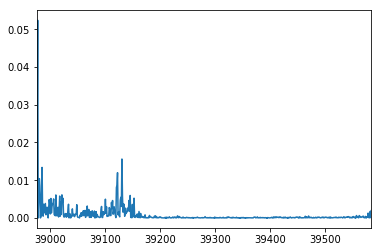

38978    0.052399
Name: power_consumption, dtype: float64

In [102]:
p1v=np.log(p1.power_consumption)
p1vv=p1v.sort_values().copy()
p1vdiff=p1vv.diff(1)
p1v22=p1vdiff.fillna(0)/max(p1vv)
p1v22.plot()
plt.show()
p1v22[p1v22>0.04]

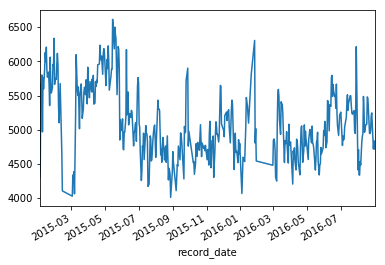

In [63]:
p1=p1[p1.power_consumption>4000]
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

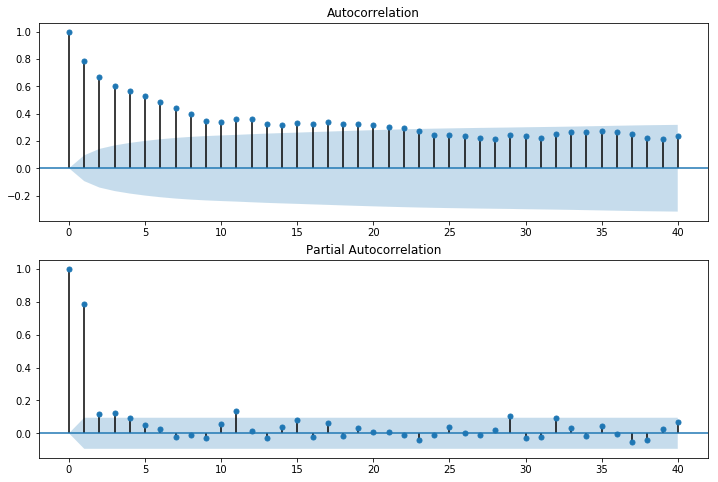

In [64]:
plotacfpacf(p1.power_consumption)

In [66]:
adf_test(p1.power_consumption,'c')

Test Statistic                  -4.386762
p-value                          0.000313
Lags Used                        3.000000
Number of Observations Used    425.000000
Critical Value (5%)             -2.868365
Critical Value (1%)             -3.445831
Critical Value (10%)            -2.570405
dtype: float64

##  自相关拖尾，偏自相关截尾，AR（3）

In [68]:
dta=p1.power_consumption
dta=dta.astype(np.float64)
arma_mod14 = sm.tsa.ARMA(dta.values,(3,0)).fit() 
forecast,stderr ,conf_int =arma_mod14.forecast(30)

## 从图上看一年有淡季旺季的区别，但去年是9月末才进入旺季，今年八月末貌似就进入了？

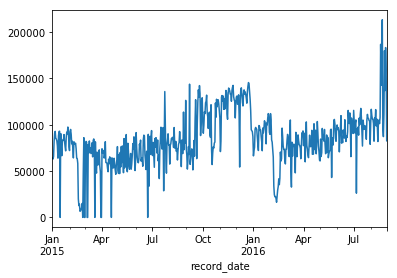

In [156]:
p1=plotuser(129)

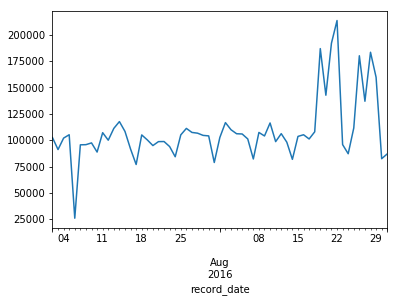

In [157]:
p1=p1[p1.record_date>'2016-07-01']
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
plt.show()

### 这种最后几天冒出来的异常值谁能断定是新的模式还是异常值而已？

In [138]:
p1.to_csv('p129.csv',index=False)

In [132]:
p1[p1.record_date>'2016-08-15']

,record_date,user_id,power_consumption
78545,2016-08-16,129,105217
78546,2016-08-17,129,101220
78547,2016-08-18,129,107984
78548,2016-08-19,129,186803
78549,2016-08-20,129,142648
78550,2016-08-21,129,191909
78551,2016-08-22,129,213379
78552,2016-08-23,129,95888
78553,2016-08-24,129,87222
78554,2016-08-25,129,111608


D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':
D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


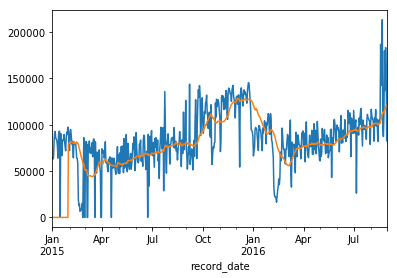

In [135]:
p1['rolling7']=pd.rolling_mean(p1.power_consumption, 30)
p1=p1.fillna(0)
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
p1rolling=pd.Series(p1.rolling7.values,index=p1.record_date,name='power_consumption')
p1rolling.plot()
plt.show()

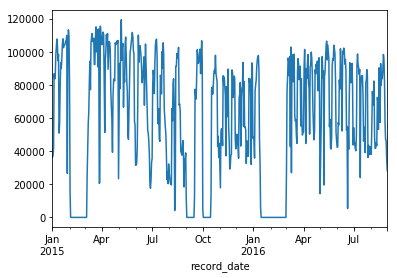

In [236]:
p1=plotuser(1307)

In [239]:
p18=p1[(p1.record_date>='2016-03-01')] 

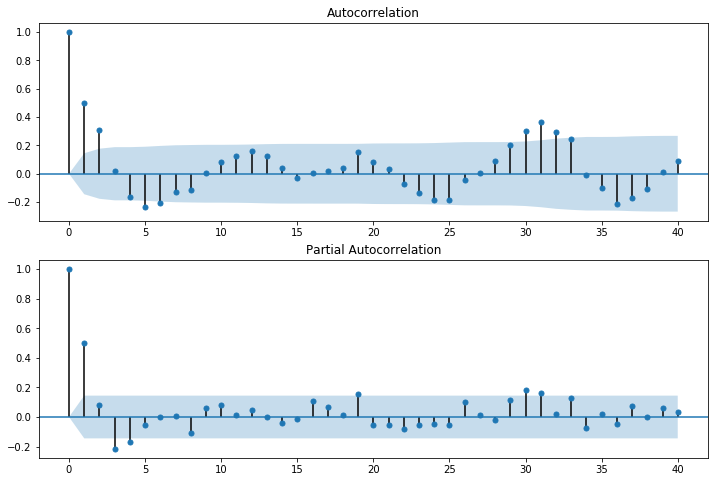

In [241]:
plotacfpacf(p18.power_consumption)

In [243]:
adf_test(p18.power_consumption,'c')

Test Statistic                -7.083629e+00
p-value                        4.598053e-10
Lags Used                      3.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (5%)           -2.877735e+00
Critical Value (1%)           -3.467211e+00
Critical Value (10%)          -2.575403e+00
dtype: float64

In [244]:
dta=p18.power_consumption
dta=dta.astype(np.float64)
arma_mod14 = sm.tsa.ARMA(dta.values,(3,0)).fit() 
forecast,stderr ,conf_int =arma_mod14.forecast(30)

In [247]:
pd.DataFrame(forecast).to_csv('forecast1307.et',index=False)

In [186]:
p1['daybefore']=p1.power_consumption.shift(1)

D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [190]:
p1['dayafter']=p1.power_consumption.shift(-1)
p1=p1.fillna(0)


,record_date,user_id,power_consumption,daybefore,dayafter
795343,2015-01-05,1307,83548,86700.0,83964.0
795349,2015-01-11,1307,94572,104218.0,98315.0
795351,2015-01-13,1307,50867,98315.0,56319.0
795355,2015-01-17,1307,89841,93500.0,95329.0
795359,2015-01-21,1307,102417,107803.0,103738.0
795366,2015-01-28,1307,26630,109836.0,104367.0
795408,2015-03-11,1307,77076,94220.0,105314.0
795412,2015-03-15,1307,106127,110982.0,106566.0
795415,2015-03-18,1307,92229,108145.0,92280.0
795419,2015-03-22,1307,99968,115002.0,113334.0


In [192]:
p1['dayofweek']=p1.record_date.apply(lambda x: x.weekday())
p11=p1[(p1.power_consumption<p1.daybefore) & (p1.power_consumption<p1.dayafter)]

In [232]:
p1['dayafter']=p1.power_consumption.shift(-1)
p1['dayafter2']=p1.power_consumption.shift(-2)
p1['dayafter3']=p1.power_consumption.shift(-3)
p1['dayafter4']=p1.power_consumption.shift(-4)
p1['daybefore']=p1.power_consumption.shift(1)
p1['daybefore2']=p1.power_consumption.shift(2)
p1['daybefore3']=p1.power_consumption.shift(3)
p1['daybefore4']=p1.power_consumption.shift(4)
p1=p1.fillna(0)
p11=p1[(p1.power_consumption<p1.daybefore) & (p1.power_consumption<p1.dayafter)
      &(p1.power_consumption<p1.daybefore2) & (p1.power_consumption<p1.dayafter2)
      &(p1.power_consumption<p1.daybefore3) & (p1.power_consumption<p1.dayafter3)
      &(p1.power_consumption<p1.daybefore4) & (p1.power_consumption<p1.dayafter4)]

In [233]:
p11.groupby(['dayofweek'],as_index=False).size()

dayofweek
0    4
1    4
2    3
3    3
4    4
5    3
6    8
dtype: int64

In [210]:
p11

,record_date,user_id,power_consumption,daybefore,dayafter,dayofweek,dayafter2,dayafter3,dayafter4,daybefore2,daybefore3,daybefore4
795470,2015-05-12,1307,81779,86307.0,104796.0,1,108880.0,97160.0,82306.0,104875.0,103281.0,94794.0
795502,2015-06-13,1307,81313,88844.0,86297.0,5,88700.0,96873.0,88640.0,96628.0,100864.0,103738.0
795547,2015-07-28,1307,22874,36554.0,27582.0,1,32239.0,26838.0,23807.0,50076.0,54373.0,60167.0
795681,2015-12-09,1307,43050,81396.0,73025.0,2,77792.0,79215.0,93584.0,74304.0,72355.0,43304.0
795694,2015-12-22,1307,36808,44177.0,38259.0,1,83937.0,81400.0,83502.0,46247.0,52747.0,54530.0
795771,2016-03-08,1307,42717,97099.0,102847.0,1,98250.0,96633.0,81834.0,85480.0,94203.0,96194.0
795795,2016-04-01,1307,51509,51657.0,91084.0,4,101391.0,82343.0,89652.0,56628.0,83775.0,55181.0
795877,2016-06-22,1307,41151,53911.0,71250.0,2,93357.0,81853.0,81248.0,54904.0,52655.0,88256.0
795904,2016-07-19,1307,46053,73796.0,53819.0,1,54392.0,81225.0,82985.0,85452.0,85060.0,85373.0
795915,2016-07-30,1307,37940,40319.0,42602.0,5,39169.0,38097.0,55274.0,43507.0,85068.0,89153.0


In [234]:
for i in range(len(p11)):
    p1=p1[p1.record_date<>p11.iloc[i]['record_date']]

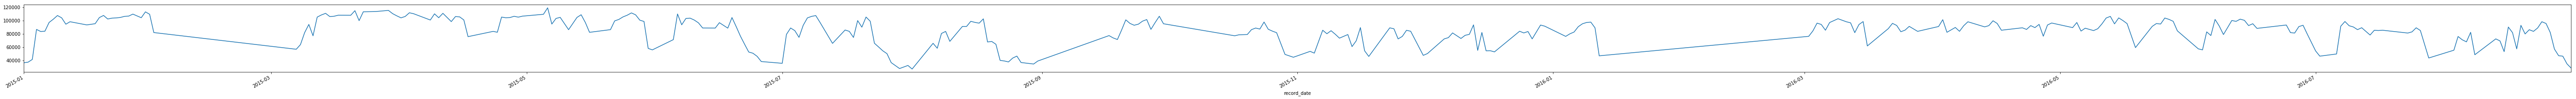

In [235]:
plot(p1)

In [223]:
p1=p1[p1.power_consumption>10]

D:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':


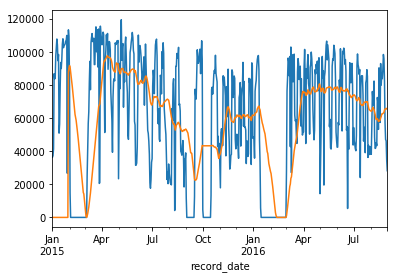

In [162]:
p1['rolling7']=pd.rolling_mean(p1.power_consumption, 30)
p1=p1.fillna(0)
p1s=pd.Series(p1.power_consumption.values,index=p1.record_date,name='power_consumption')
p1s.plot()
p1rolling=pd.Series(p1.rolling7.values,index=p1.record_date,name='power_consumption')
p1rolling.plot()
plt.show()

In [263]:

def plot(dataframe,fsize):
    p1s=pd.Series(dataframe.power_consumption.values,index=dataframe.record_date,name='power_consumption')
    p1s.plot(figsize=fsize)
    plt.show()
    

In [184]:
p18=p1[(p1.record_date>='2015-09-01') & (p1.record_date<='2015-10-01')]
p18.to_csv('p1307.csv')

### 放假情况有点奇怪，2月份春节放假30天、15年9月3号是中国抗战胜利纪念日（是因为这个吗？），放了14天假，国庆节当天没放假，2号开始放了14天假，1月15开始放了46天假

In [180]:
p1[p1.power_consumption<=10].to_csv('p1307.csv')

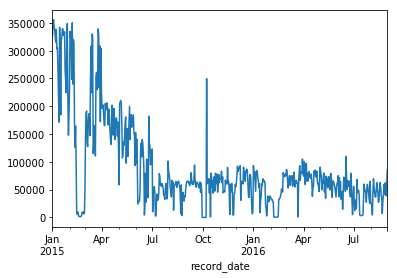

In [249]:
p1=plotuser(1262)

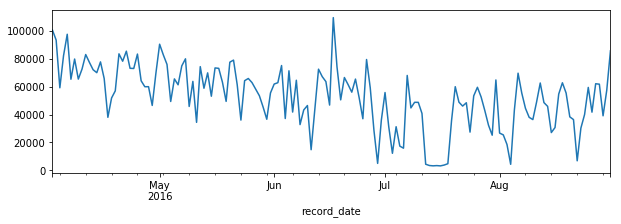

In [271]:
p11=p1[p1.record_date>'2016-04-01']
plot(p11,(10,3))

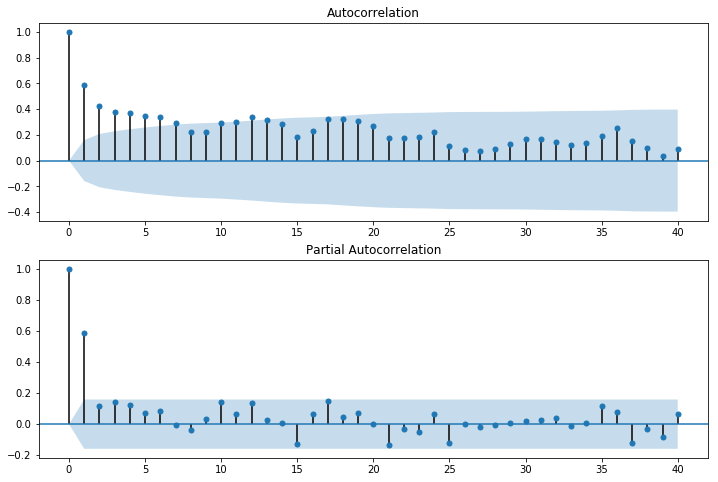

In [272]:
plotacfpacf(p11.power_consumption)

In [273]:
adf_test(p11.power_consumption,'c')

Test Statistic                -6.195078e+00
p-value                        5.992607e-08
Lags Used                      0.000000e+00
Number of Observations Used    1.510000e+02
Critical Value (5%)           -2.880878e+00
Critical Value (1%)           -3.474416e+00
Critical Value (10%)          -2.577081e+00
dtype: float64

In [278]:
arma_mod42 = sm.tsa.ARMA(dta,(1,2)).fit() 
print(arma_mod42.aic,arma_mod42.bic,arma_mod42.hqic)

(3404.725743636711, 3419.8451462409421, 3410.8677701087549)


In [280]:
forecast,stderr ,conf_int =arma_mod42.forecast(30)
pd.DataFrame(forecast).to_csv('forecast1262.et',index=False,header=False)

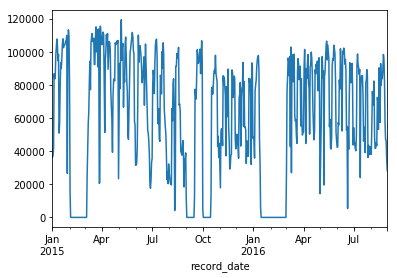

In [281]:
p1307=plotuser(1307)

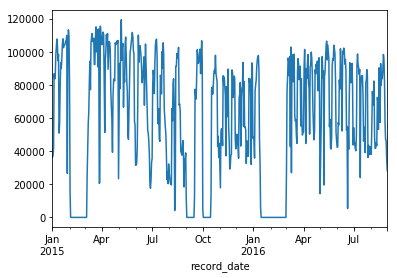

In [282]:
p1310=plotuser(1310)

In [293]:
pmer=pd.merge(p1307,p1310,on=['record_date'])
pmer['diff']=pmer.power_consumption_y-pmer.power_consumption_x

In [295]:
pmer[pmer['diff']>0]

,record_date,user_id_x,power_consumption_x,date1310,user_id_y,power_consumption_y,diff
